Author: Peter Sun  
Date: Nov 10, 2023  

Simulation for the mrfmsim paper. 

In this notebook, we look at data from Longenecker in 2012 paper.

## Longenecker2012nov

Both data requires reprocess some old files. I was unable to locate Longenecker processed data,
here we reprocess the log data in the MRFM addit curve folder, and convert the matlab script
LC_workup_data_collector.m. In the folder, there's a readme file that details the experimental
condition. The last two data files in the folder are tests, they are discarded.

The readme file:
```
From Marohn's notes with JGL on 2011/11/22:  "Touching is 6.4; conversion is 23.7 nm/V.  Distances in this plot of John Mamin's [Mamin - Freq scans at different spacings 11-21-2011.pdf] are therefore 21.3 nm, 33.2 nm, and 45.0 nm.  Joni looked at 5.50 V and 5.75 V, concludes that gradient is 5E6 T/m.  This is about equal to John Mamin's estimate of 4 to 5E6 T/m.  About equal to 5.1E6 T/m seen in the Degen PNAS work."

IBM-Cornell:

2011-11-23

JGL: README file for all frequency scans in 'MRFM addit curves directory'; the files are listed in the order they apprear in the folder
Note1: The voltage is in each file in column C; the frequencies are in column BB



1D scan log_2011-11-16_20-45-07: Very first signal, obtained Wednesday night (11-16-2011)
Voltage: 4V (? will confirm on 11/28) (Yes, LC)


1D scan log_2011-11-17_18-49-50: Data taken Thursday night (11-17-2011); first large signal
Voltage: 5V
Number averages: 15


1D scan log_2011-11-18_16-41-10: Start of weekend scans
Voltage: 5.75V
Frequency range: 117-126 MHz
Step size: 250 kHz
Number averages: 20


1D scan log_2011-11-19_09-51-07
Voltage: 5.75V
Frequency range: 111-117 MHz
Step size: 500 kHz
Number averages: 15


1D scan log_2011-11-19_14-24-27
Voltage: 5.5V
Frequency range: 117-125 MHz
Step size: 250 kHz
Number averages: 20


1D scan log_2011-11-20_05-42-59: 
Voltage: 5.5V
Frequency range: 111-117 MHz
Step size: 500 kHz
Number averages: 15


1D scan log_2011-11-20_10-16-19: 
Voltage: 5.25V
Frequency range: 117-123 MHz
Step size: 250 kHz
Number averages: 20


1D scan log_2011-11-20_21-52-11: 
Voltage: 5.25V
Frequency range: 111-117 MHz
Step size: 500 kHz
Number averages: 15


1D scan log_2011-11-21_02-25-29: 
Voltage: 4.5V
Frequency range: 117-121.5 MHz
Step size: 250 kHz
Number averages: 15

1D scan log_2011-11-21_09-04-54: 
Voltage: 4.5V
Frequency range: 111-117 MHz
Step size: 500 kHz
Number averages: 15 


1D scan log_2011-11-21_14-08-18: This data is taken after all of the above sweeps, in order to see if stitching between the halves of the data could be improved
Voltage: 5.75V
Frequency range: 115.5 to 117.5 MHz
Step size: 500 kHz
Number averages: 15 (? must confirm with John Mamin)


1D scan log_2011-11-21_15-42-04: This data is taken after all of the above sweeps, in order to see if stitching between the halves of the data could be improved
Voltage: 4.5V
Frequencies: 116 and 117.25 MHz
Number averages: 15 (? must confirm with John Mamin)
```


The matlab script is as the following (the plotting part is not included):

```
%%% LC_workup_data_collector.m
%
% this progam read in the all .dat file and organized into .mat file
% for future work up
% Lei Chen
% lc646@cornell.edu
%
%
% The tip parameters are
%
%   cobalt = magnet material
%   220nm x 90nm x 1500nm = ESTIMATED tip dimensions
%% Preliminaries and constants

% Erase plots and workspace 

close all;
clear all;
clc;

% Exporting options; saving the figure is slow!

query_save_figures = 0;
query_save_workspace = 0;

% Nice defaults for figures

set(0,'DefaultAxesFontName','times');
set(0,'DefaultTextFontName','times');
set(0,'DefaultAxesFontSize',10);
set(0,'DefaultTextFontSize',12);
set(0,'Units','inches');
get(0,'ScreenSize');

%% Read in the spin noise signal versus frequency at different tip-sample distance
 file{1} = dlmread('1D scan log_2011-11-16_20-45-07.dat'); % 1 scan at 4V
 file{2} = dlmread('1D scan log_2011-11-17_18-49-50.dat'); % 1 scan at 5V
 file{3} = dlmread('1D scan log_2011-11-18_16-41-10.dat'); % up half scan at 5.75V 117 MHz
 file{4} = dlmread('1D scan log_2011-11-19_09-51-07.dat'); % down half scan at 5.75V
 file{5} = dlmread('1D scan log_2011-11-19_14-24-27.dat'); % up half scan at 5.5V
 file{6} = dlmread('1D scan log_2011-11-20_05-42-59.dat'); % down half scan at 5.5V
 file{7} = dlmread('1D scan log_2011-11-20_10-16-19.dat'); % up half scan at 5.25V
 file{8} = dlmread('1D scan log_2011-11-20_21-52-11.dat'); % down half scan at 5.25V
 file{9} = dlmread('1D scan log_2011-11-21_02-25-29.dat'); % up half scan at 4.5V
 file{10} = dlmread('1D scan log_2011-11-21_09-04-54.dat'); % down half scan 4.5V
 file{11} = dlmread('1D scan log_2011-11-21_14-08-18.dat'); % 5.75V 115.5 to 117.5 MHz
 file{12} = dlmread('1D scan log_2011-11-21_15-42-04.dat'); % 4.5 V 116 to 117.25 MHz

for i = 1:2
    data.Dts = (6.32-file{i}(1,3))*23.7; %[nm] Covert piezo tube z voltage into tip-sample distance
    data.F = file{i}(:,48); % Spin noise signal [aN^2]
    data.Freq = file{i}(:,54)/1E6; % RF freq [MHz]
    data.Fstdv = file{i}(:,7);% standard deviation of spin noise signal
    FreqScan(i)= data;
end

for i =  3:2:9% stitch files of 1 scan together

    data.Dts = (6.32-file{i}(1,3))*23.7; %[nm] Covert piezo tube z voltage into tip-sample distance
    data.F = vertcat(file{i+1}(:,48),file{i}(:,48)); % Spin noise signal [aN^2]
    data.Freq = vertcat(file{i+1}(:,54),file{i}(:,54))/1E6; % RF freq [MHz]
    data.Fstdv = vertcat(file{i+1}(:,7),file{i}(:,7));% standard deviation of spin noise signal
    FreqScan((i+1)/2+1)=data;
end

for i = 11:12
    data.Dts = (6.32-file{i}(1,3))*23.7; %[nm] Covert piezo tube z voltage into tip-sample distance
    data.F = file{i}(:,48); % Spin noise signal [aN^2]
    data.Freq = file{i}(:,54)/1E6; % RF freq [MHz]
    data.Fstdv = file{i}(:,7); % standard deviation of spin noise signal
    FreqScan(i)= data;
end
%% save FreqScan to a .mat file

save('FreqScan.mat','FreqScan');

%% plot all data

figure('Color',[1 1 1],'Units','normalized','Position',[0.05,0.95,0.3,0.60]);


        %errorbar(signal_amp,signal_prompt_avg,signal_prompt_std,'ko');
        %hold on;
        %errorbar(signal_amp,signal_persist_avg,signal_persist_std,'bo');
        
colorset = {'black','blue','red','green','cyan','magenta'};
markerset={'o','s','d','^','v','h'};
j = 1;
  for i = [3,4,5,2,6,1]
        
        plot(FreqScan(i).Freq,FreqScan(i).F+(j-1)*3500,markerset{j},'color',colorset{j});
        hold on;
        j = j+1;
  end
  for i = 1:6 % set label strings for each curve
      h{i} = [int2str(FreqScan(i).Dts),' nm'];
  end
  lh=legend(h{3},h{4},h{5},h{2},h{6},h{1},'Location','NorthEast');
        set(lh,'Box','off');
        xlabel('RF freqency [MHz]');
        xlim([111 130]);
        ylabel('\sigma_{spin}^{ 2} [aN^2]');
%% Save figure

if query_save_figures == 1 % slow; so don't save unless requested

    savefig('freqscan','png','-r300');    
    savefig('freqscan','pdf');
    
end
```

Note we discard the last two data files according to the readme file.

All the data file are located in the data folder. The first two files are processed differently than the next 8 files.

In [1]:
import glob

# read the dat files and convert them into pandas (not mat files according to the script above)
# get the list of files (sorted by time)
flist = sorted(glob.glob("data/longenecker/*.dat"))

# the files are treated differently, the first two and the middle ten are processed differently
# the middle ones are the most complicated stitching i have ever seen
# matlab starts the indices at 1 not 0

flist_1 = flist[:2]
flist_2 = flist[2:-2]

The matlab script:
```
for i = 1:2
    data.Dts = (6.32-file{i}(1,3))*23.7; %[nm] Covert piezo tube z voltage into tip-sample distance
    data.F = file{i}(:,48); % Spin noise signal [aN^2]
    data.Freq = file{i}(:,54)/1E6; % RF freq [MHz]
    data.Fstdv = file{i}(:,7);% standard deviation of spin noise signal
    FreqScan(i)= data;
end
```

In [2]:
# using the namedtuple to keep it as close as the matlab files
from collections import namedtuple
import numpy as np

data_tuple = namedtuple("data", ["Dts", "F", "Freq", "Fstdv"])
freqscan_1 = []

for f in flist_1:
    datfile = np.genfromtxt(f, delimiter="	")
    Dts = (
        6.32 - datfile[0, 2]
    ) * 23.7  # [nm] Covert piezo tube z voltage into tip-sample distance
    F = datfile[:, 47]  # Spin noise signal [aN^2]
    Freq = datfile[:, 53] / 1e6  # RF freq [MHz]
    Fstdv = datfile[:, 6]  # standard deviation of spin noise signal
    d = data_tuple(Dts, F, Freq, Fstdv)
    freqscan_1.append(d)

the matlab file
```
for i =  3:2:9% stitch files of 1 scan together
    data.Dts = (6.32-file{i}(1,3))*23.7; %[nm] Covert piezo tube z voltage into tip-sample distance
    data.F = vertcat(file{i+1}(:,48),file{i}(:,48)); % Spin noise signal [aN^2]
    data.Freq = vertcat(file{i+1}(:,54),file{i}(:,54))/1E6; % RF freq [MHz]
    data.Fstdv = vertcat(file{i+1}(:,7),file{i}(:,7));% standard deviation of spin noise signal
    FreqScan((i+1)/2+1)=data;
# end
```

In [3]:
freqscan_2 = []

grouped_flist_2 = [flist_2[i : i + 2] for i in range(0, len(flist_2), 2)]
for f1, f2 in grouped_flist_2:
    datfile1 = np.genfromtxt(f1, delimiter="	")
    datfile2 = np.genfromtxt(f2, delimiter="	")

    Dts = (
        6.32 - datfile1[0, 2]
    ) * 23.7  # [nm] Covert piezo tube z voltage into tip-sample distance
    F = np.concatenate((datfile2[:, 47], datfile1[:, 47]))  # Spin noise signal [aN^2]
    Freq = np.concatenate((datfile2[:, 53], datfile1[:, 53])) / 1e6  # RF freq [MHz]
    Fstdv = np.concatenate(
        (datfile2[:, 6], datfile1[:, 6])
    )  # standard deviation of spin noise signal
    d = data_tuple(Dts, F, Freq, Fstdv)
    freqscan_2.append(d)

In [4]:
# combine the data set and sort it by tip sample separation

freqscan = freqscan_1 + freqscan_2
freqscan.sort(
    key=lambda x: x.Dts, reverse=True
)  # sorted the files by tip sample separation

# plot the data to check if matches the paper

# remove the 54.98 nm entry as it is not shown in the paper

freqscan = freqscan[1:]

# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(8, 14))

# gs = fig.add_gridspec(6, hspace=0.0)
# axs = gs.subplots(sharex=True, sharey=True)


# for i, sig in enumerate(freqscan):
#     axs[i].scatter(
#         sig.Freq, sig.F, color="none", edgecolor="black", label=f"{sig.Dts:.2f} nm"
#     )
#     axs[i].legend(loc="upper left")

# for ax in axs.flat:
    # ax.label_outer()

## Experiment simulation

Requires mmodel 7.0+, mrfmsim 0.2.0+, mrfmsim-marohn 0.2.0+, and mrfmsim-plot 0.0.1

In [5]:
import numpy as np
from mrfmsim.experiment import IBMCyclic
from mrfmsim.component import Grid, Sample, RectangularMagnet
from mrfmsim.shortcut import loop_shortcut

import numpy as np

In [6]:
grid = Grid(shape=(201, 201, 21), step=[2.0, 2.0, 2.0], origin=[0.0, 0.0, -20.0])
sample = Sample(spin="1H", temperature=5.5, T1=10, T2=5e-6, spin_density=49.0)

# B1 = 5 # mT
df_fm = 2.0e6  # Hz
B0 = 2630.5  # mT

IBMCyclic_looped = loop_shortcut(loop_shortcut(IBMCyclic, "f_rf"), "h")

f_rf_list = np.arange(110.0e6, 126.5e6, 0.5e6)
h_list = np.array([(0, 0, f.Dts) for f in freqscan])

print(IBMCyclic_looped)

IBMCyclic(B0, df_fm, f_rf_loop, grid, h_loop, magnet, sample)
returns: dF2_spin, dF_spin
graph: ibm_cyclic_graph
handler: MemHandler
components:
- magnet: ['Bz_method', 'Bzx_method']
- sample: ['J', 'Gamma', 'spin_density', 'temperature']
- grid: ['grid_array', ['grid_voxel', 'voxel']]

Simulate an IBM-style cyclic-inversion magnetic resonance force microscope
experiment.


In the paper's supporting info, Longenecker listed 2 possibilities for the fitting.
First, treat as if there is no deadlayer, but the overall saturation magnetization is reduced to 0.69 T.
The second option is to treat the magnetization as 1.8 T (measured by the magnetometry,
and the same as bulk material), but add 51 nm of dead layer.
In Figure 4 of the paper, the fitting uses the second case with additional parameter adjustment.
Here we should the cases for additional deadlayer cases and use 51 to back out the constant used for the fitting (roughly).
Here we ignore the last height since it is not used in the paper.

In [7]:
key_format = "{} mT $\mu_0M_s$ {} nm deadlayer"
signal_damage = {}

# magnet with deadlayer or reduced magnetization

for mu0_Ms, dlayer in [(690, 0), (1800, 45), (1800, 51), (1800, 60)]:
    magnet_d = RectangularMagnet(
        length=[225.0, 79.0, 1494.0 - dlayer],
        mu0_Ms=mu0_Ms,
        origin=[0.0, 0.0, (1494 - dlayer) / 2.0],
    )

    h_list_d = h_list + np.array([0, 0, dlayer])  # extraneous tip-sample separation
    signal_d = IBMCyclic_looped(B0, df_fm, f_rf_list, grid, h_list_d, magnet_d, sample)
    signal_damage[key_format.format(mu0_Ms, dlayer)] = signal_d

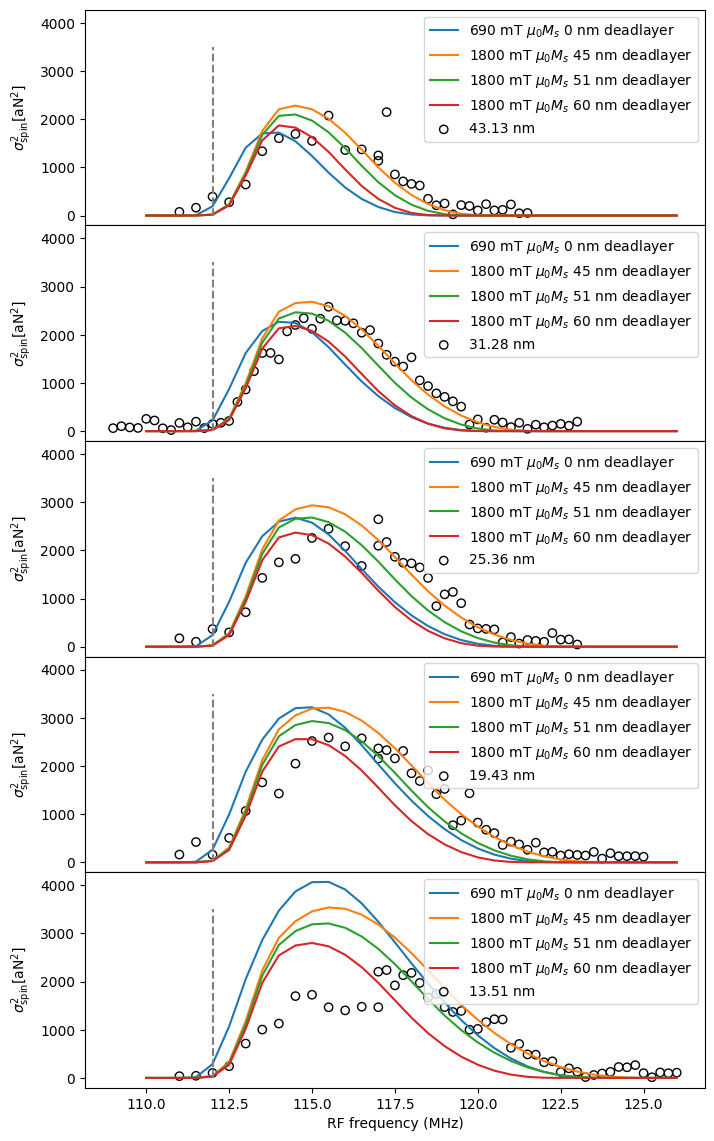

In [8]:
import matplotlib.pyplot as plt

f_larmor = B0 * sample.Gamma / (2 * np.pi)

fig = plt.figure(figsize=(8, 14))

gs = fig.add_gridspec(len(freqscan), hspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)


for i, sig in enumerate(freqscan):
    for m, sim_sig in signal_damage.items():
        # only look at dF2_spin
        sim_sig = [-s[0] for s in sim_sig[i]]
        axs[i].plot(f_rf_list / 1e6, sim_sig, label=f"{m}")

    axs[i].scatter(
        sig.Freq,
        sig.F,
        color="none",
        edgecolor="black",
        label=f"{sig.Dts:.2f} nm",
    )
    axs[i].vlines(f_larmor / 1e6, 0, 3500, color="grey", linestyles="dashed")
    axs[i].legend(loc="upper right")

for ax in axs.flat:
    ax.label_outer()
    ax.set_xlabel("RF frequency (MHz)")
    ax.set_ylabel("$\sigma^2_\mathrm{spin} [\mathrm{aN}^2]$")

# axs[0].set_title(
#     "Fit comparison Longenecker 2012 \n $^1$H, 5.5 K, 49 nm$^{-3}$ spins, "
#     "10 s $T_1$, 5 $\mathrm{\mu}$s $T_2$, 2360.5 mT $B_0$, 2 MHz $\Delta f_\mathrm{FM}$"
# )
plt.savefig("figures/longenecker_fit_comparison.pdf", bbox_inches="tight")
plt.show()

In this simulation, we can see that 51 nm is not the best fit for the experiment, rather, the 40 nm model is better.

## Lineshape

One of the ways we can analyze the experiment is to use visual representations.
The graph functionalities also show the usability of the package.

In the last section of the model, we have the force variance signal calculated from
the sum of the product of "Bzx2, rel_dpol". Here we plot both Bzx2, B_offset, rel_dpol,
and the dF_spin for the three different points. We define a plotting function to replace
the "force variance signal" node. We also remove the force signal node
from the graph to speed up the process.

Particularly we plot a volume plot with some opacity. Instead of rendering we save it
directly to a folder with proper names. Here we add some input parameters to the function
and the graph is able to pick up the parameters.

In [9]:
from mrfmsim.plot import pvplots, mplots
from mrfmsim import Node

# IBMCyclic.visualize() # look at the graph


def plot_rel_dpol(
    Bzx2, Bz, rel_dpol, mz2_eq, spin_density, grid_voxel, grid, f_rf, h, file_path
):
    """Plotted the force variance and associated properties.

    Plot both the positive and negative (reverse color)."""
    dF2_spin_volume = Bzx2 * rel_dpol * mz2_eq * spin_density * grid_voxel

    fnames = ["Bz", "Bzx2", "rel_dpol", "dF2_spin_volume"]

    for cmap, opacity, note in [
        ("Blues_r", "linear_r", "_reverse"),
        ("Blues", "linear", ""),
    ]:
        for i, data in enumerate([Bz, Bzx2, rel_dpol, dF2_spin_volume]):
            p = pvplots.volume(data, grid, off_screen=True, cmap=cmap, opacity=opacity)
            p.background_color = "whitesmoke"
            p.add_axes(viewport=(0.0, 0.1, 0.3, 0.4))
            p.screenshot(
                f"{file_path}/{fnames[i]}_{round(h[2], 2)}nm_{f_rf/1e6}MHz{note}.png"
            )
            p.clear()
            p.close()

In [10]:
# combination of mmodel and networkx API
G = IBMCyclic.graph
H = G.subgraph(["force variance signal"])
G = G.replace_subgraph(H, Node("plot_rel_dpol", plot_rel_dpol))
G.remove_nodes_from(["force signal", "mz_eq"])

# G.visualize() # look at the modified graph
ibm_plots = IBMCyclic.edit(graph=G, returns=None)

# print(ibm_plots)

We can continue by looping the experiment in f_rf. Here we pick 112.5, 117, 122.5 MHz.
We model at 40 nm damage, 13.51 nm tip-sample separation (effectively 53.51 nm).
The figures are saved to the "figures/lineshape" folder.

The folder needs to be created first.

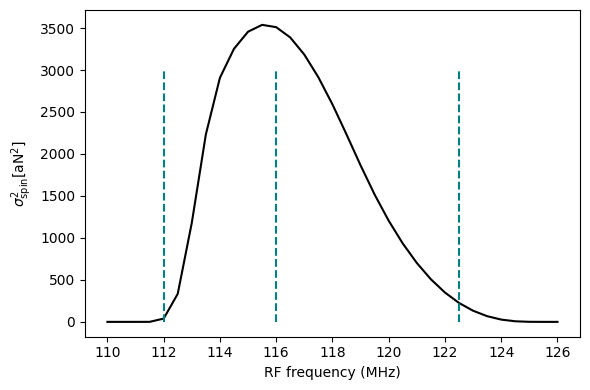

In [11]:

plt_f_rf_list = [f_larmor, 116.0e6, 122.5e6]
h_index = np.where(h_list == [0, 0, 31.28])
sim_sig = signal_damage["1800 mT $\mu_0M_s$ 45 nm deadlayer"]
sim_sig = [-s[0] for s in sim_sig[i]]

fig = plt.figure(figsize=(6, 4))
plt.plot(f_rf_list / 1e6, sim_sig, "-", color="black")
plt.xlabel("RF frequency (MHz)")
plt.ylabel("$\sigma^2_\mathrm{spin} [\mathrm{aN}^2]$")

for f_rf in plt_f_rf_list:
    plt.vlines(x=f_rf / 1e6, ymin=0, ymax=3000, color="teal", linestyles="dashed")
plt.tight_layout()
plt.savefig("figures/longenecker_31.28.pdf")
plt.show()

In [12]:
ibm_plots_looped = loop_shortcut(ibm_plots, "f_rf")

h = h_list[-1] + np.array([0, 0, 45.0])  # extraneous tip sample separation
magnet_damage51 = RectangularMagnet(
    length=[225.0, 79.0, 1494.0 - 45.0],
    mu0_Ms=1800,
    origin=[0.0, 0.0, (1494 - 45.0) / 2.0],
)
# Hz

ibm_plots_looped(
    B0,
    df_fm,
    plt_f_rf_list,
    "figures/lineshape/longenecker/",
    grid,
    h,
    magnet_damage51,
    sample,
)